In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import shutil
import re
import time
import json
from requests import get
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import cv2 as cv

#### Fist attempt:

In [2]:
url = 'https://www.google.com/search?q=city+squares&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj5xc-A6ZjoAhW0unEKHQIUBHwQ_AUoAXoECAsQAw'

In [3]:
response = get(url)
html_soup = BeautifulSoup(response.text, 'html.parser')

In [4]:
html_soup

<html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><title>city squares - Cerca con Google</title><style>#gbar,#guser{font-size:13px;padding-top:1px !important;}#gbar{height:22px}#guser{padding-bottom:7px !important;text-align:right}.gbh,.gbd{border-top:1px solid #c9d7f1;font-size:1px}.gbh{height:0;position:absolute;top:24px;width:100%}@media all{.gb1{height:22px;margin-right:.5em;vertical-align:top}#gbar{float:left}}a.gb1,a.gb4{text-decoration:underline !important}a.gb1,a.gb4{color:#00c !important}.gbi .gb4{color:#dd8e27 !important}.gbf .gb4{color:#900 !important}
body,td,div,.p,a{font-family:arial,sans-serif}#gbar{float:left;height:22px;padding-left:2pxfont-size:13px}.j{width:34em}</style><script type="text/javascript"></script></head>
<body bgcolor="#ffffff" marginheight="3" topmargin="3">
<div id="gbar"><nobr><a class="gb1" href="https://www.google.it/search?tab=iw">Ricerca</a> <b class="gb1">Immagini</b> <a class="gb1" href="https://maps.google.it/maps?

In [5]:
html_soup.find_all('a')

[<a class="gb1" href="https://www.google.it/search?tab=iw">Ricerca</a>,
 <a class="gb1" href="https://maps.google.it/maps?hl=it&amp;tab=il">Maps</a>,
 <a class="gb1" href="https://play.google.com/?hl=it&amp;tab=i8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/results?gl=IT&amp;tab=i1">YouTube</a>,
 <a class="gb1" href="https://news.google.it/nwshp?hl=it&amp;tab=in">News</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=im">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=io">Drive</a>,
 <a class="gb1" href="https://www.google.it/intl/it/about/products?tab=ih" style="text-decoration:none"><u>Altro</u> »</a>,
 <a class="gb4" href="http://www.google.it/history/optout?hl=it">Cronologia web</a>,
 <a class="gb4" href="/preferences?hl=it">Impostazioni</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=it&amp;passive=true&amp;continue=https://www.google.com/search%3Fq%3Dcity%2Bsquares%26source%3Dlnms%26tbm%3Disch%26sa%3DX%26ved%3D2ahUKEwj

In [6]:
html_soup.find_all('a')[20]

<a href="/url?q=https://popupcity.net/observations/town-squares-apples-contested-new-product/&amp;sa=U&amp;ved=0ahUKEwjTjrK1_JjoAhUwzqYKHeCOBRUQqoUBCBQwBg&amp;usg=AOvVaw289kx6dNW1u_n2O3SAnVVg"><img height="86" src="http://t3.gstatic.com/images?q=tbn:ANd9GcSQHnBvLEJWaMwHHWGQxu4k0Ejvam58jpyRpyItsHKjbvTM1anIgTLhnjHF" style="border:1px solid #ccc;padding:1px" width="150"/></a>

In [7]:
html_soup.find_all('a')[20].find_all('img')

[<img height="86" src="http://t3.gstatic.com/images?q=tbn:ANd9GcSQHnBvLEJWaMwHHWGQxu4k0Ejvam58jpyRpyItsHKjbvTM1anIgTLhnjHF" style="border:1px solid #ccc;padding:1px" width="150"/>]

In [8]:
len(html_soup.find_all('a'))

46

### Ok, Now it's time to build the scraping function

In [2]:
def scrape_google_image(url, name_folder):
    """This function scrapes images from an URL coming from google 
       images and save them into a specified folder.
       
    Args: 
        url: Google images url.
        name_folder: name of the new folder.
        
    Return:
        images folder in the current file system
    """
    # Delete previous homonyms folder and create it if doesn't exist
    if os.path.exists(str(name_folder)):
        shutil.rmtree(name_folder, ignore_errors=True)
        os.makedirs(str(name_folder))
    else:
        os.makedirs(str(name_folder))
    response = get(url)
    html_soup = BeautifulSoup(response.text, 'html.parser')
    for num in range(len(html_soup.find_all('a'))):
        stringa = html_soup.find_all('a')[num].find_all('img')
        search = re.search('src="(.+?)" style', str(stringa))
        if search is not None:
            link = search[1]
            response = get(link)
            img=np.asarray(Image.open(BytesIO(response.content)))
            img = cv.resize(img, (450,300))
#             img.save(name_folder+'/img_'+str(num)+'.jpg', 'JPEG', quality=100)
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            cv.imwrite(name_folder+'/img_'+str(num)+'.jpg', img)

In [3]:
scrape_google_image('https://www.google.com/search?q=city+squares&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj5xc-A6ZjoAhW0unEKHQIUBHwQ_AUoAXoECAsQAw',
                    name_folder='city squares')

### Give a look:

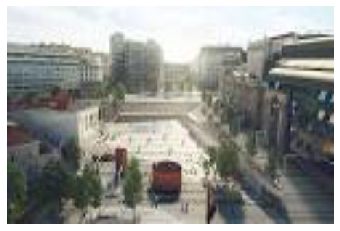

In [4]:
img = np.asarray(Image.open('city squares/img_33.jpg'))
plt.imshow(img)
plt.axis('off')
plt.show()

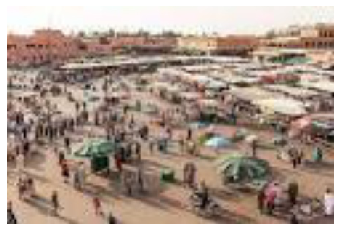

In [5]:
img2 = np.asarray(Image.open('city squares/img_25.jpg'))
plt.imshow(img2)
plt.axis('off')
plt.show()

### Other images.

In [6]:
scrape_google_image('https://www.google.it/search?q=piazze+di+milano&source=lnms&tbm=isch&sa=X&ved=2ahUKEwi898nL9rXoAhVH_SoKHYBVCpIQ_AUoAnoECA4QBA&biw=1536&bih=750&dpr=1.25',
                    name_folder='piazze di milano')

### Again

In [7]:
scrape_google_image('https://www.google.it/search?q=piazze+di+italia&tbm=isch&ved=2ahUKEwjes4TN9rXoAhVI-6QKHdSBCaUQ2-cCegQIABAA&oq=piazze+di+italia&gs_l=img.3..0j0i8i30j0i10i24.87802.88665..88839...0.0..0.177.799.1j5......0....1..gws-wiz-img.......0i24.NdKbNw4tsj4&ei=z3Z7Xp6QBMj2kwXUg6aoCg&bih=750&biw=1536',
                    name_folder='piazze di italia')

In [3]:
scrape_google_image('https://www.google.com/search?q=command+line&client=firefox-b-d&source=lnms&tbm=isch&sa=X&ved=2ahUKEwis2b68gPXoAhULLewKHfWdDSMQ_AUoAXoECBMQAw&biw=1536&bih=750',
                   name_folder='comand_line')